##### Importando as bibliotecas

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

##### Criando a URL usada na requisição

In [41]:
BASE_URL = 'https://api.eia.gov/v2/'
ENDPOINT = 'steo/data/'
API_KEY = 'SGAhHVmpFwQmerb0JBQX5QfRKnMgJfuFab9i82ld'

params = {
    "api_key": f"{API_KEY}",
    "frequency": "monthly",
    "data[0]": ["value"],
    "facets[seriesId][]":['ZOTOIUS','QSIC_CL','QSIC_DF','QSIC_DF_PCT','QSIC_EL','QSIC_NG','QSIC_NG_PCT'],
    "start": None, # formato "YYYY-MM-DD"
    "end": None, # formato "YYYY-MM-DD"
    "sort[0][column]": ["period"],
    "sort[0][direction]": ["desc"],
    "offset": 0,
    "length": 5000
}

url = BASE_URL + ENDPOINT

In [42]:
response = requests.get(url, params=params)
response.status_code

200

In [43]:
data = response.json()

In [44]:
data['response']['data']

[{'period': '2026-12',
  'seriesId': 'QSIC_CL',
  'seriesDescription': 'Coal-weighted Industrial Production Index',
  'value': '94.51382',
  'unit': 'Index, 2017=100'},
 {'period': '2026-12',
  'seriesId': 'ZOTOIUS',
  'seriesDescription': 'Total Industrial Production Index',
  'value': '103.4596',
  'unit': 'Index, 2017=100 (seasonally adjusted)'},
 {'period': '2026-12',
  'seriesId': 'QSIC_NG_PCT',
  'seriesDescription': 'Natural Gas-weighted Industrial Production Index',
  'value': '-.2825344',
  'unit': 'Percent change from prior year'},
 {'period': '2026-12',
  'seriesId': 'QSIC_NG',
  'seriesDescription': 'Natural Gas-weighted Industrial Production Index',
  'value': '94.81374',
  'unit': 'Index, 2017=100'},
 {'period': '2026-12',
  'seriesId': 'QSIC_EL',
  'seriesDescription': 'Electricity-weighted Industrial Production Index',
  'value': '97.35838',
  'unit': 'Index, 2017=100'},
 {'period': '2026-12',
  'seriesId': 'QSIC_DF_PCT',
  'seriesDescription': 'Distillate-weighted Indu

In [46]:
industrial_prod = pd.DataFrame(data['response']['data']).sort_values(by=['seriesId','period'],ascending=False)
industrial_prod.head()

,period,seriesId,seriesDescription,value,unit
1,2026-12,ZOTOIUS,Total Industrial Production Index,103.4596,"Index, 2017=100 (seasonally adjusted)"
8,2026-11,ZOTOIUS,Total Industrial Production Index,103.3664,"Index, 2017=100 (seasonally adjusted)"
15,2026-10,ZOTOIUS,Total Industrial Production Index,103.2765,"Index, 2017=100 (seasonally adjusted)"
22,2026-09,ZOTOIUS,Total Industrial Production Index,103.1987,"Index, 2017=100 (seasonally adjusted)"
29,2026-08,ZOTOIUS,Total Industrial Production Index,103.1093,"Index, 2017=100 (seasonally adjusted)"


In [68]:
industrial_prod.tail()

,period,seriesId,seriesDescription,value,unit
3073,1990-05-01,QSIC_CL,Coal-weighted Industrial Production Index,93.799583,"Index, 2017=100"
3080,1990-04-01,QSIC_CL,Coal-weighted Industrial Production Index,94.290662,"Index, 2017=100"
3087,1990-03-01,QSIC_CL,Coal-weighted Industrial Production Index,94.141540,"Index, 2017=100"
3094,1990-02-01,QSIC_CL,Coal-weighted Industrial Production Index,94.061775,"Index, 2017=100"
3101,1990-01-01,QSIC_CL,Coal-weighted Industrial Production Index,93.820312,"Index, 2017=100"


In [61]:
industrial_prod.period = pd.to_datetime(industrial_prod.period)
industrial_prod.value = pd.to_numeric(industrial_prod.value)

In [63]:
industrial_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3108 entries, 1 to 3101
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period             3108 non-null   datetime64[ns]
 1   seriesId           3108 non-null   object        
 2   seriesDescription  3108 non-null   object        
 3   value              3108 non-null   float64       
 4   unit               3108 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 210.2+ KB


<Axes: xlabel='period'>

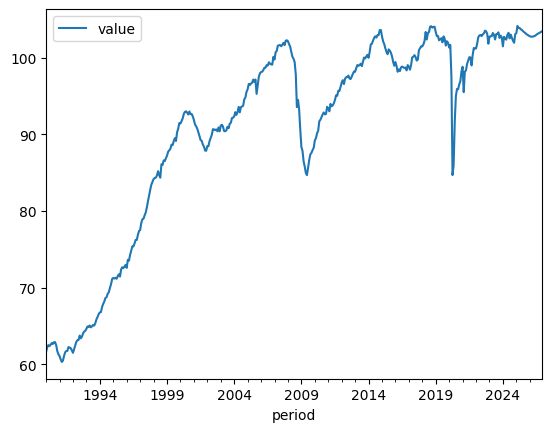

In [67]:
industrial_prod[industrial_prod.seriesId=='ZOTOIUS'].plot(x='period', y='value')